# FIT dati sperimentali GCR

In questo colab si sono presi i dati sperimentali del flusso dei raggi cosmici in funzione dell'energia cinetica del nucleone di protoni, elio e boro. Si è poi fatto un fit per trovare un'espressione analitica. Trovata l'espressione si osserva che non è integrabile analiticamente, quindi si cerca una funzione che la maggiori in ogni punto per applicare il metodo monte carlo del rigetto ottimizzato.

*Osservazioni*: i dati sperimentali vengono da PAMELA (Payload for Antimatter Matter Exploration and Light-nuclei Astrophysics), un modulo di ricerca sui raggi cosmici collegato a un satellite in orbita terrestre. Lanciato nel 2006, è stato il primo esperimento satellitare dedicato alla rivelazione dei raggi cosmici, con particolare attenzione alla loro componente di antimateria, sotto forma di positroni e antiprotoni.
I dati si possono trovare al sito https://www.ssdc.asi.it/ nella sezione Pamela

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Problem_solving

MessageError: ignored

In [ ]:
#OPEN DATA
dati=pd.read_csv('dati_Pamela.txt', sep='\s+')
elio4=pd.read_csv('4He_dati.txt', sep='\s+')
boro=pd.read_csv('B_dati.txt', sep='\s+')

**Protoni**: dati sperimentali del flusso dei raggi cosmici per nucleone. Viene fatto il fit per trovare un'espressione analitica della distrinuzione dei raggio cosmici, riportati i parametri con relative incertezze e il chi quadro ridotto

In [ ]:
print(dat)

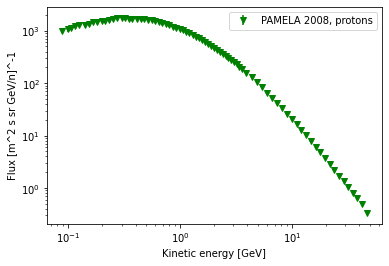

In [ ]:
plt.errorbar(dati.X, dati.Y, yerr=dati.YErrorHigh, color='green', label='PAMELA 2008, protons', marker='v', linestyle='' )
plt.xlabel('Kinetic energy [GeV]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
plt.yscale("log")
plt.xscale("log")

plt.show()

In [ ]:
Er=0.938             #GeV energia a riposo del protone

#phi=500*10**(6)     #V
#e=1.6*10**(-19)      #C
#Z=1
#A=1
#fattore_conv=6.24*10**9             #from J to GeV
#PHI2=phi*e*Z*fattore_conv/A         #GeV
#PHI=PHI2
#print('PHI=', PHI2)
PHI=0.7

def model1(T, gamma, b, a, A):
  g=A*(T+a*np.exp(-b*T)+PHI)**(-gamma)*T*(T+2*Er)/((T+PHI)*(T+2*Er+PHI))
  return g


In [ ]:
#fit protoni

parameters, covariance = curve_fit(model1, dati.X, dati.Y)
fit_gammap=parameters[0]
fit_bp=parameters[1]
fit_ap=parameters[2]
fit_Ap=parameters[3]
fit_yp=model1(dati.X,fit_gammap, fit_bp, fit_ap, fit_Ap)

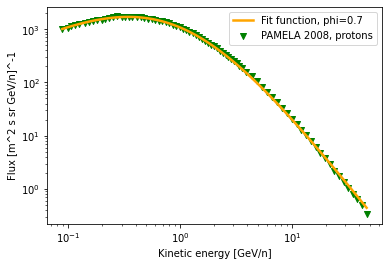

In [ ]:
plt.scatter(dati.X, dati.Y,  color='green', label='PAMELA 2008, protons', marker='v')
plt.plot(dati.X, fit_yp, label='Fit function, phi=0.7', color='orange', linewidth=2.5)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Kinetic energy [GeV/n]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
#plt.savefig('protoni_dati.pdf')
plt.show()

In [ ]:
fiterrP=np.sqrt(np.diag(covariance))
print('Parametri: gamma, b, a, A = ', fit_gammap, fit_bp, fit_ap, fit_Ap)
print('Errore sui parametri protoni=', fiterrP)

Parametri: gamma, b, a, A =  2.6679654957349133 9.616633222173988e-05 0.2531363265814472 13578.006792033113
Errore sui parametri protoni= [4.49572691e-02 1.17640467e+01 2.83757272e+00 1.07857281e+05]


In [ ]:
#calcolo del chi quadro fit protoni
x_protons=dati['X']
dati_obs_p=dati['Y']
err=dati['YErrorHigh']

exp_proton=[]
for T in x_protons:
 protons=fit_Ap*(T+fit_ap*np.exp(-fit_bp*T)+PHI)**(-fit_gammap)*T*(T+2*Er)/((T+PHI)*(T+2*Er+PHI))
 exp_proton.append(protons)

N=78      #numero di punti
M=4       #numero di parametri
dof=N-M   #gradi di libertà

chi_quadro=np.sum((dati_obs_p-exp_proton)**2/err**2)
chi_quadro_ridotto=chi_quadro/dof
print('chi quadro ridotto fit protoni =', chi_quadro_ridotto)


chi quadro ridotto fit protoni = 1.0719834183162287


**Elio-4**: si ripete lo stesso procedimento dei protoni, utilizzando la stessa funzione di fit

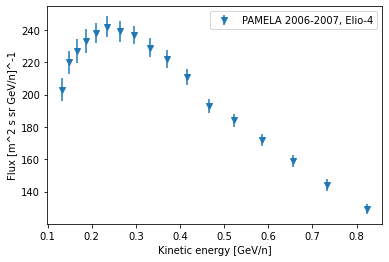

In [ ]:
plt.errorbar(elio4.X, elio4['Y,'] ,yerr=elio4.YErrorHigh, label='PAMELA 2006-2007, Elio-4', marker='v',  linestyle='')
plt.xlabel('Kinetic energy [GeV/n]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
plt.show()

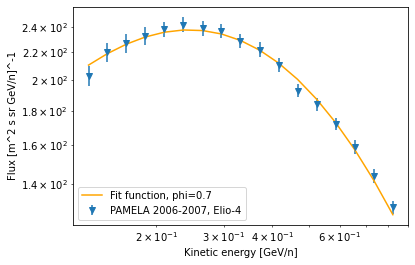

In [ ]:
#FIT ELIO

Er=0.938*4 #energia a riposo GeV
PHI=0.7  #modulazione solare GeV

parameters, covarianceHe = curve_fit(model1, elio4.X, elio4['Y,'], [2.65,1,1,10], bounds=([0,0,0,0],[10,5, 10**3, 10**20]))

fit_gammaHe=parameters[0]
fit_bHe=parameters[1]
fit_aHe=parameters[2]
fit_AHe=parameters[3]

fit_y_He=model1(elio4.X, fit_gammaHe, fit_bHe, fit_aHe, fit_AHe)


plt.errorbar(elio4.X, elio4['Y,'] ,yerr=elio4.YErrorHigh, label='PAMELA 2006-2007, Elio-4', marker='v',  linestyle='')
plt.plot(elio4.X, fit_y_He, label='Fit function, phi=0.7', color='orange')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Kinetic energy [GeV/n]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
#plt.savefig('elio_dati.pdf')
plt.show()

In [ ]:
fiterrHe=np.sqrt(np.diag(covarianceHe))
print('Parametri gamma, b, a, A = ', fit_gammaHe, fit_bHe, fit_aHe, fit_AHe)
print('Errore sui parametri elio=', fiterrHe)

Parametri gamma, b, a, A =  2.8813093302805695 0.5229460621847495 3.3495804973135826e-13 849.3253523553328
Errore sui parametri elio= [2.84009121e-01 6.85499679e-11 8.16559427e-02 1.74164673e+02]


In [ ]:
#calcolo del chi quadro fit elio

x_He=elio4['X']
dati_obs_He=elio4['Y,']
err=elio4['YErrorHigh']

exp_He=[]
for T in x_He:
 He=fit_AHe*(T+fit_aHe*np.exp(-fit_bHe*T)+PHI)**(-fit_gammaHe)*T*(T+2*Er)/((T+PHI)*(T+2*Er+PHI))
 exp_He.append(He)

N=17     #numero di punti
M=4       #numero di parametri
dof=N-M   #gradi di libertà

chi_quadro_He=np.sum((dati_obs_He-exp_He)**2/err**2)
chi_quadro_ridotto_He=chi_quadro_He/dof
print('chi quadro ridotto fit elio =', chi_quadro_ridotto_He)


chi quadro ridotto fit elio = 0.5867595589550423


**Boro**: si ripete lo stesso procedimento dei protoni, utilizzando la stessa funzione di fit

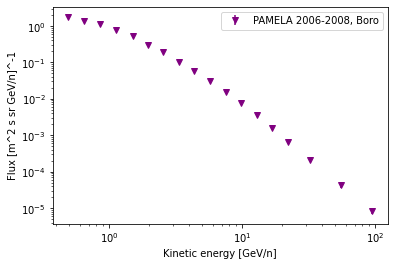

In [ ]:
plt.errorbar(boro.X, boro.Y, yerr=boro.YErrorHigh, label='PAMELA 2006-2008, Boro', color='purple',  linestyle='', marker='v')
plt.xlabel('Kinetic energy [GeV/n]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.yscale("log")
plt.xscale("log")

plt.legend()
plt.show()

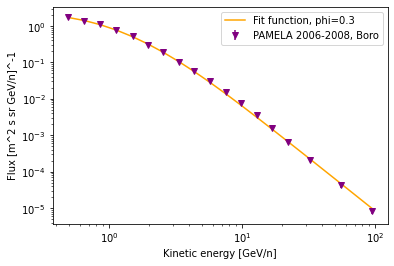

In [ ]:
#FIT BORO

Er=0.938*11 #energia a riposo GeV
PHI=0.3

parameters, covarianceB = curve_fit(model1, boro.X, boro.Y,  [2.65,1,200,10000])


fit_gamma=parameters[0]
fit_b=parameters[1]
fit_a=parameters[2]
fit_A=parameters[3]

fit_y_B=model1(boro.X, fit_gamma, fit_b, fit_a, fit_A)


plt.errorbar(boro.X, boro.Y, yerr=boro.YErrorHigh, label='PAMELA 2006-2008, Boro', color='purple',  linestyle='', marker='v')
plt.plot(boro.X, fit_y_B, label='Fit function, phi=0.3', color='orange')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Kinetic energy [GeV/n]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
#plt.savefig('boro_dati.pdf')
plt.show()


In [ ]:
fiterrB=np.sqrt(np.diag(covarianceB))
print('Parametri gamma, b, a, A = ', fit_gamma, fit_b, fit_a, fit_A)
print('Errore sui parametri boro=', fiterrB)

Parametri gamma, b, a, A =  2.9306701737322496 0.26867882810640464 0.5909613562955389 6.165362667908796
Errore sui parametri boro= [ 2.04214858  1.87665239  1.37768371 26.63295905]


In [ ]:
#calcolo del chi quadro fit boro

x_boro=boro['X']
dati_obs_B=boro['Y']
err=boro['YErrorHigh']

exp_boro=[]
for T in x_boro:
 Boro=fit_A*(T+fit_a*np.exp(-fit_b*T)+PHI)**(-fit_gamma)*T*(T+2*Er)/((T+PHI)*(T+2*Er+PHI))
 exp_boro.append(Boro)

N=18      #numero di punti
M=4       #numero di parametri
dof=N-M   #gradi di libertà

chi_quadro_B=np.sum((dati_obs_B-exp_boro)**2/err**2)
chi_quadro_ridotto_B=chi_quadro_B/dof
print('chi quadro ridotto fit boro =', chi_quadro_ridotto_B)

chi quadro ridotto fit boro = 0.7234561451147226


Funzione che maggiora per Monte carlo - metodo del rigetto: cerco una funzione che maggiori in ogni punto la distribuzione dei raggi cosmici. La funzione deve avere cumulativa invertibile per applicare il metodo del rigetto. Si calcola per protoni ed elio (2 diverse funzioni)

In [ ]:
#FUNZIONE CHE MAGGIORA PROTONI
def f1(x):
  f1 = 1800
  return f1

vector1=[]
for x in np.arange(0.1,2, 0.1):
  vector1.append(f1(x))

vector2=[]
def f2(x):
  f2=1800*(x-1)**(-1)
  return f2
for x in np.arange(2,50, 0.1):
  vector2.append(f2(x))

vector1=np.array(vector1)
vector2=np.array(vector2)

x1=np.arange(0.1,2,0.1)
x2=np.arange(2,50,0.1)


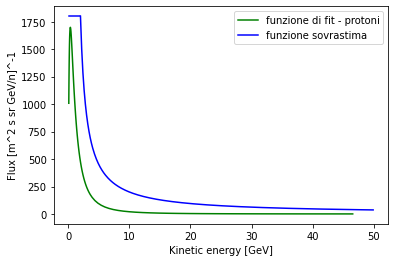

In [ ]:
plt.plot(dati.X,fit_yp, color='green', label='funzione di fit - protoni')
plt.plot(x1,vector1, c='blue', label='funzione sovrastima')
plt.plot(x2,vector2, c='blue')
plt.xlabel('Kinetic energy [GeV]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
#plt.yscale("log")
#plt.xscale("log")
plt.savefig('fit1_protoni.pdf')
plt.show()

In [ ]:
#FUNZIONE CHE MAGGIORA ELIO
def f3(x):
  f3 = 250
  return f3

vector3=[]
for x in np.arange(0.1,0.31, 0.01):
  vector3.append(f3(x))

vector4=[]
g=250/np.exp(-0.3)

def f4(x):
  f4=g*np.exp(-x)
  return f4
for x in np.arange(0.3,1, 0.01):
  vector4.append(f4(x))

vector3=np.array(vector3)
vector4=np.array(vector4)

x3=np.arange(0.1,0.31, 0.01)
x4=np.arange(0.3, 1, 0.01)

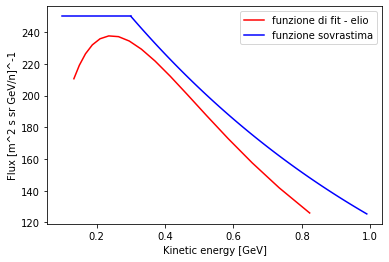

In [ ]:
plt.plot(elio4.X, fit_y_He, color='red', label='funzione di fit - elio')
plt.plot(x3,vector3, c='blue', label='funzione sovrastima')
plt.plot(x4,vector4, c='blue')
plt.xlabel('Kinetic energy [GeV]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
#plt.yscale("log")
#plt.xscale("log")
plt.savefig('fit2.pdf')
plt.show()

In [ ]:
#FUNZIONE CHE MAGGIORA BORO
vector5=[]
vector6=[]

def f5(x):
  f5 = 2
  return f5
k=2*2**3

def f6(x):
  f6=k*x**(-3)
  return f6

for x in np.arange(0.4,2, 0.01):
  vector5.append(f5(x))
for x in np.arange(2,100, 0.01):
  vector6.append(f6(x))

vector5=np.array(vector5)
vector6=np.array(vector6)

x5=np.arange(0.4,2,0.01)
x6=np.arange(2, 100,0.01)


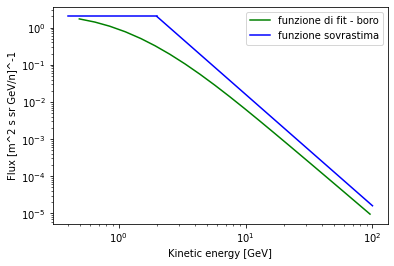

In [ ]:
plt.plot(boro.X, fit_y_B, color='green', label='funzione di fit - boro')
plt.plot(x5,vector5, c='blue', label='funzione sovrastima')
plt.plot(x6,vector6, c='blue')
plt.xlabel('Kinetic energy [GeV]')
plt.ylabel('Flux [m^2 s sr GeV/n]^-1')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.savefig('fit3.pdf')
plt.show()